In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
#Drug set ups

def s1_inters_bif_line(s1p, s1x0): #intersection of the bifurcation with dz = 0
        s1z, s1x1 = s1p
        return (s1x1**3 + 2*s1x1**2 - 4.1 + s1z, s1x1 - s1x0 - s1z/4)
    
def s2_inters_bif_vert(s2p, s2z): #intersection of the bifurcation with the vertical line
    s2x1 = s2p
    return (s2x1**3 + 2*s2x1**2 - 4.1 + s2z)

def f1_find_the_delta(f1x0):
    
    from scipy.optimize import fsolve
    
    f1all_the_deltas = []
    for m in f1x0:
        f1z, f1x1 = fsolve(s1_inters_bif_line, (3, -1), m) 
        #print(f'The intersection between the bifurcation line and the nullcline of z for x0 = {m} is at point ({f1z};{f1x1})')
        
        f1inters1, f1inters2, f1inters3 = fsolve(s2_inters_bif_vert, (-2, -1, 1), f1z)
        #print(f'And the intersections between the vertical line of z = {f1z} are at x1 = {f1inters1, f1inters2, f1inters3}')
        #return (f1z, f1x1)
        
        f1delta = abs(f1inters1 - f1inters2)
        #print(f'And the gap to push x1 above the separatrix has to be more than {f1delta}')
        
        f1all_the_deltas.append(f1delta)
    return(f1all_the_deltas)

In [10]:
def dose_effect(fdrug, fdose, fstarting_x0):
    
    fdose = fdose*12.3 # Concersion from human dose to mouse
    
    fx0 = np.arange(-3.025,-2.062,0.001)
    fall_the_deltas = f1_find_the_delta(fx0)
    plt.plot(fx0, fall_the_deltas)
    
    fmax_mest_effect = 29.9*np.log10(184.5) - 19.5 #I set the phenytoin as referral drug for max MEST effect by using
    #maximal phenytoin dose
    
    if fdrug == 'phenytoin':
        feffect = 29.9*np.log10(fdose) - 19.5 #mest curve for phenytoin
    if fdrug == 'carbamazepine':
        feffect = 15.8*np.log10(fdose) - 1.03 #mest curve for carbamazepine
    if fdrug == 'valproate':
        feffect = 9.97*np.log10(fdose) - 5.97 #mest curve for valproate
        
    frelative_drug_effect = feffect/fmax_mest_effect #relative % effect compared to maximal phenytoin
    
    fwhere_is_x0 = np.where(fx0 > fstarting_x0) #I seek for the starting x0 and corresponding i in the I-x0 relationship
    fstarting_x0_idx = fwhere_is_x0[0][0] -1 
    fstarting_i = fall_the_deltas[fstarting_x0_idx]
    
    feffect_ep_i = frelative_drug_effect*(2-fstarting_i) #I calculate the relative effect of the dose on the epileptor
    
    fwhere_is_i =np.where(fall_the_deltas < (feffect_ep_i + fstarting_i)) #I find the new x0 based on the relative effect
    ffinal_i_idx = fwhere_is_i[0][0] 
    ffinal_x0 = fx0[ffinal_i_idx]
    
    print(fstarting_x0, "became", ffinal_x0)
    return ffinal_x0

-3.025 became -3.024
-3.0 became -3.0120000000000013
-2.975 became -2.998000000000003
-2.95 became -2.9850000000000043
-2.9250000000000003 became -2.971000000000006
-2.9000000000000004 became -2.9570000000000074
-2.8750000000000004 became -2.942000000000009
-2.8500000000000005 became -2.9280000000000106
-2.8250000000000006 became -2.9130000000000122
-2.8000000000000007 became -2.898000000000014
-2.775000000000001 became -2.8830000000000156
-2.750000000000001 became -2.868000000000017
-2.725000000000001 became -2.853000000000019
-2.700000000000001 became -2.8370000000000206
-2.675000000000001 became -2.8220000000000223
-2.6500000000000012 became -2.806000000000024
-2.6250000000000013 became -2.790000000000026
-2.6000000000000014 became -2.7740000000000276
-2.5750000000000015 became -2.7580000000000293
-2.5500000000000016 became -2.741000000000031
-2.5250000000000017 became -2.725000000000033
-2.5000000000000018 became -2.708000000000035
-2.475000000000002 became -2.6920000000000366
-2.4

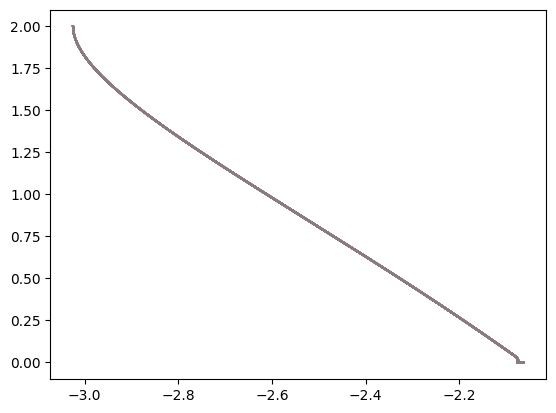

In [24]:
starting_x0 = np.arange(-3.025,-2.075,0.025)
drug = "valproate"
dose = 10
difference = []
for i in starting_x0:
    difference.append(dose_effect(drug, dose, i) - i)
    
#plt.plot(starting_x0, difference)


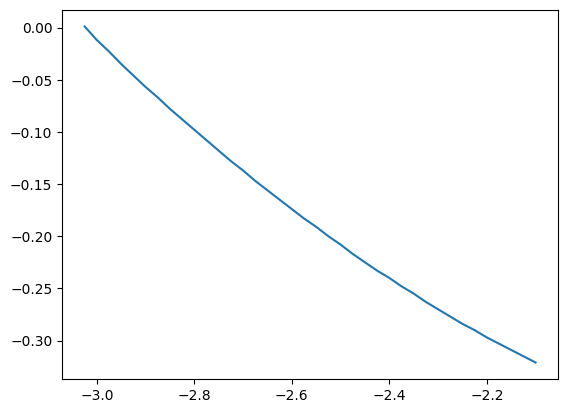

In [25]:
plt.plot(starting_x0, difference)